<a href="https://colab.research.google.com/github/Facundoheck/Python-challenge/blob/main/An%C3%A1lisis_financiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de datos financieros**

In [5]:
!gdown 1k2-LLXFzsM8rkWMyaBpjLugwRGhKs1qM

Downloading...
From: https://drive.google.com/uc?id=1k2-LLXFzsM8rkWMyaBpjLugwRGhKs1qM
To: /content/budget_data.csv
100% 1.34k/1.34k [00:00<00:00, 5.73MB/s]


In [6]:
import csv

#abre un archivo csv, convierte el archivo en una lista con encabezados
def openFile(archivo):
    global lista
    with open(archivo,'r') as apertura:
        lectura=csv.reader(apertura)
        lista=[]
        for i in lectura:
            lista.append(i)
    return lista

#guardo en una variable "data" la lista con los datos del archivo
data=openFile('budget_data.csv')

#inicializo la lista que voy a extraer de "data"
fecha=[]
for i in data:
    fecha.append(i[0])
#elimino el indice de la lista
fecha.pop(0)
#cuento la cantidad de datos que existen en la lista (sin contar el indice)
count=len(fecha)
print_count=f"Total months: {count}"

In [7]:
#inicializo la lista que voy a extraer de "data"
profitorlosses=[]
for i in data:
    profitorlosses.append(i[1])
#elimino el indice de la lista
profitorlosses.pop(0)
#convierto la lista de ganancias y perdidas a tipo entero
profitorlosses_int=list(map(int,profitorlosses))
#los sumo y los guardo en una nueva variable "total"
total=sum(profitorlosses_int)

print_total=f"Total: ${total}"

In [8]:
promedio= round((total / count), 2)

print_prom=f"Average change: ${promedio}"

In [9]:
#guardo el maximo de las ganancias en "maximo"
maximo=max(profitorlosses_int)
#itero sobre la lista de perdidas y ganancias paralelo a su fecha correspondiente
for i,j in zip(fecha,profitorlosses_int):
  #comparo el maximo con la lista de perdidas y ganancias
  if j == maximo:
    print_max=f"Greatest increase in profits: {i} - ${j}"

In [10]:
#guardo el minimo de las ganancias en "minimo"
minimo=min(profitorlosses_int)
#itero sobre la lista de perdidas y ganancias paralelo a su fecha correspondiente
for i,j in zip(fecha,profitorlosses_int):
  #comparo el maximo con la lista de perdidas y ganancias
  if j == minimo:
    print_min=f"Greatest decrease in profits: {i} - ${j}"

In [11]:
#guardo en una lista los resultados de las operaciones anteriores
resultados=[print_count,print_total,print_prom,print_max,print_min]
#abro el archivo en modo escritura, si no existe se crea uno automaticamente
with open("soluciones.txt", "w") as archivo:
    archivo.write("Financial Analysis" + "\n\n" + "-"*50 + "\n\n")
    for resultado in resultados:
      #escribe el resultado en el archivo
      archivo.write(str(resultado) + "\n\n")

print("Resultado exportado al archivo 'soluciones.txt'")

Resultado exportado al archivo 'soluciones.txt'


Ingresa el mes que deseas visualizar (en formato 'Jan', 'Feb', etc.): Apr


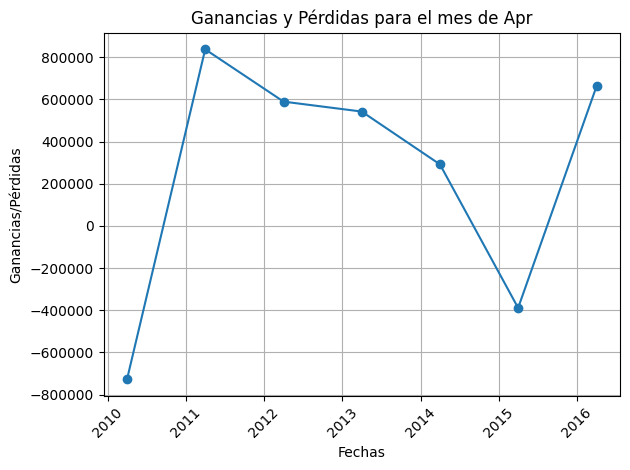

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

#convierto las fechas del archivo en formato de fecha
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')

#solicito al usuario el mes que desea visualizar
mes_usuario = input("Ingresa el mes que deseas visualizar (en formato 'Jan', 'Feb', etc.): ")

#filtro los datos para el mes ingresado por el usuario
data_mes = data[data['Date'].dt.strftime('%b') == mes_usuario]

#creo el gráfico lineal para el mes ingresado por el usuario
plt.plot(data_mes['Date'], data_mes['Profit/Losses'], marker='o')
plt.xlabel('Fechas')
plt.ylabel('Ganancias/Pérdidas')
plt.title(f'Ganancias y Pérdidas para el mes de {mes_usuario}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
